In [139]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables) 



{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [140]:
import pandas as pd
import numpy as np

df_X=pd.DataFrame(X)
col=list(default_of_credit_card_clients.variables['description'])
col[0]="ID"
col=col[1:-1]
df_X.columns = col
df_y=pd.DataFrame(y)
df_y.columns=["DEFAULT"]

df=df_X.join(df_y['DEFAULT']).copy(deep=True)

print(df)


       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

In [141]:
# import missingno as msno
# import matplotlib.pyplot as plt
# msno.matrix(df_X,labels=True, fontsize=12,width_ratios=(50,34), color=(0.2,0.4,0.6))
# plt.show()

print(df.isna().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [142]:
print("Marriage:", df['MARRIAGE'].unique())
print("Education:", df['EDUCATION'].unique())
print("Sex:", df['SEX'].unique())

Marriage: [1 2 3 0]
Education: [2 1 3 5 4 6 0]
Sex: [2 1]


In [143]:
print(len(df[(df['MARRIAGE']==0) | (df['EDUCATION']==0)]))
print(len(df))


68
30000


In [144]:
df=df[(df['MARRIAGE']!=0) & (df['EDUCATION']!=0)]

In [145]:
print("Marriage:", df['MARRIAGE'].unique())
print("Education:", df['EDUCATION'].unique())
print("Sex:", df['SEX'].unique())

Marriage: [1 2 3]
Education: [2 1 3 5 4 6]
Sex: [2 1]


In [146]:
from sklearn.utils import resample
df_defaulted=df[df['DEFAULT']==0]
df_not_defaulted=df[df['DEFAULT']==1]


print(len(df_defaulted))
print(len(df_not_defaulted))

df_defaulted_downsized= resample(df_defaulted,replace=False,n_samples=1000,random_state=42)
df_not_defaulted_downsized= resample(df_not_defaulted,replace=False,n_samples=1000,random_state=42)
print('----------')
print(len(df_defaulted_downsized))
print(len(df_not_defaulted_downsized))

df=pd.concat([df_defaulted_downsized,df_not_defaulted_downsized])
print('----------')
print(len(df))

23301
6631
----------
1000
1000
----------
2000


In [147]:
X=df.drop(columns=['DEFAULT'],axis=1).copy(deep=True)
y=df['DEFAULT'].copy(deep=True)

In [148]:
# from sklearn.preprocessing import OneHotEncoder
# ohe=OneHotEncoder(sparse_output=False)
# temp_1=ohe.fit_transform(X[["MARRIAGE"]])
# temp_1=pd.DataFrame(temp_1,columns=["MARRIAGE_"+ str(cat) for cat in ohe.categories_[0]]).astype(int)

# temp_2=ohe.fit_transform(X[["SEX"]])
# temp_2=pd.DataFrame(temp_2,columns=["SEX_"+ str(cat) for cat in ohe.categories_[0]]).astype(int)

# temp_3=ohe.fit_transform(X[["EDUCATION"]])
# temp_3=pd.DataFrame(temp_3,columns=["EDUCATION_"+ str(cat) for cat in ohe.categories_[0]]).astype(int)

# X=X.drop(columns=["MARRIAGE","SEX","EDUCATION"])
# X=X.join(temp_1).join(temp_2).join(temp_3)

# Using pandas.get_dummies to one-hot encode multiple columns at once
X = pd.get_dummies(X, columns=["MARRIAGE", "SEX", "EDUCATION"], drop_first=False)


In [149]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [150]:
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)


In [151]:
from sklearn.svm import SVC
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train,y_train)

SVC(random_state=42)

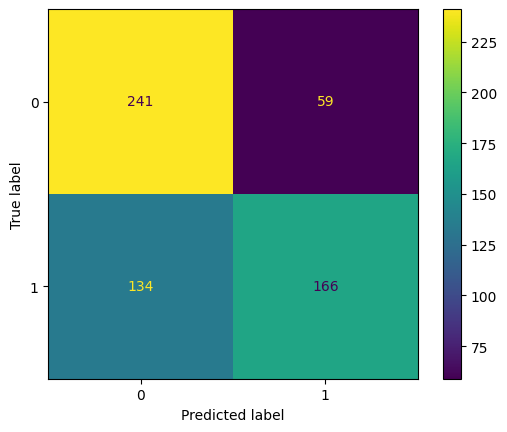

In [153]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_svm.classes_)
disp.plot()
plt.show()
